In [1]:
%cd /data/Data
# pwd
import numpy as np
import sys
import pandas as pd
from pathlib import Path
import glob
import pickle
import matplotlib.pyplot as plt


/data/Data


In [2]:
file_list = ['0']
for file_name in Path('/data/Data').glob("100_*.csv"):
    file_list.append(file_name)
    # print(file_name)
    
file_list.pop(0) # removing '0'
#print(file_list)

KeyboardInterrupt: 

In [3]:
file_list = ['0']
file_list_results = ['0']
for file_name in glob.glob("*.csv"):
    file_list.append(file_name)
    # print(file_name)
    
for file_name in glob.glob("*cascs.csv"):
    file_list_results.append(file_name)
    # print(file_name)
    
file_list.pop(0) # removing '0'
file_list_results.pop(0)

'0'

In [4]:
print(len(file_list))
print(len(file_list_results))

88128
44064


In [6]:
print(len(file_list))

88128


In [5]:
file_list_simulations = list(set(file_list) - set(file_list_results)) # getting only the simulation csv files and removing results.csv 

In [7]:
print(len(file_list_simulations))

44064


In [8]:
simulation_number = [file_name.split("_")[0] for file_name in file_list_simulations]

In [9]:
print(len(simulation_number))

44064


In [10]:
# building dictionary of scenario number and the corresponding name of the csv file with the simulation data
simulation_files_dict = {}
simulation_results_dict = {}
for file_name in file_list_simulations:
    simulation_files_dict[int(file_name.split("_")[0])] = file_name
for file_name in file_list_results:
    simulation_results_dict[int(file_name.split("_")[0])] = file_name

# print(simulation_files_dict)
# print(simulation_results_dict)

In [11]:
len(simulation_results_dict)

44064

In [13]:
pickle.dump( simulation_files_dict, open( "simulation_files_dict.pkl", "wb" ) )
pickle.dump( simulation_results_dict, open( "simulation_results_dict.pkl", "wb" ) )

PermissionError: [Errno 13] Permission denied: 'simulation_files_dict.pkl'

In [13]:
simulation_files_dict[1001]

'1001_Line 21 - 22_load=0.7_wind=0_0.8_1.0.csv'

In [17]:
file = simulation_files_dict[1001]
df = pd.read_csv(file, dtype = str)
df = df.iloc[1:,:]
df.head()

,All calculations,B_L03,B_L04,B_L07,B_L08,B_L12,B_L15,B_L16,B_L18,B_L20,...,Line 17 - 18.2,Line 17 - 27.2,Line 21 - 22.2,Line 22 - 23.2,Line 23 - 24.2,Line 25 - 26.2,Line 26 - 27.2,Line 26 - 28.2,Line 26 - 29.2,Line 28 - 29.2
1,0.000000,1.006305,1.003323,0.995081,1.003518,1.002283,1.002628,1.007725,1.002908,0.995060,...,11.938800,-62.213099,-75.328176,30.889060,-10.963268,-33.280042,65.419989,-26.391686,-31.091298,33.692662
2,0.001000,1.006305,1.003323,0.995081,1.003518,1.002283,1.002628,1.007725,1.002908,0.995060,...,11.938786,-62.213094,-75.328183,30.889066,-10.963270,-33.280030,65.419996,-26.391684,-31.091298,33.692655
3,0.002000,1.006305,1.003323,0.995081,1.003518,1.002282,1.002628,1.007725,1.002908,0.995060,...,11.938760,-62.213085,-75.328195,30.889078,-10.963271,-33.280007,65.420011,-26.391681,-31.091297,33.692642
4,0.003000,1.006305,1.003323,0.995081,1.003518,1.002282,1.002628,1.007725,1.002908,0.995060,...,11.938730,-62.213074,-75.328203,30.889090,-10.963276,-33.279985,65.420022,-26.391676,-31.091295,33.692632
5,0.004000,1.006305,1.003323,0.995081,1.003518,1.002282,1.002628,1.007725,1.002908,0.995060,...,11.938699,-62.213060,-75.328208,30.889100,-10.963284,-33.279963,65.420031,-26.391671,-31.091291,33.692623


In [18]:
df.iloc[range(2,400),175:185].head()

,Trf Load_25,Trf Load_26,Trf Load_27,Trf Load_28,Trf Load_29,Line 01 - 02.1,Line 01 - 39.1,Line 02 - 03.1,Line 02 - 25.1,Line 03 - 04.1
3,4.000000,5.000000,3.000000,5.000000,4.000000,-419.021717,419.021717,0.394646,-216.871625,-14.999970
4,4.000000,5.000000,3.000000,5.000000,4.000000,-419.021694,419.021694,0.394675,-216.871615,-14.999959
5,4.000000,5.000000,3.000000,5.000000,4.000000,-419.021674,419.021674,0.394702,-216.871605,-14.999949
6,4.000000,5.000000,3.000000,5.000000,4.000000,-419.021654,419.021654,0.394727,-216.871596,-14.999940
7,4.000000,5.000000,3.000000,5.000000,4.000000,-419.021637,419.021637,0.394750,-216.871587,-14.999932


In [19]:
sub_data_frame = df[df['All calculations'].astype(float)> 1.1]# and df['All calculations'].astype(float)< 10  ]
sub_data_frame = sub_data_frame[sub_data_frame['All calculations'].astype(float)< 5]# and df['All calculations'].astype(float)< 10  ]

sub_data_frame.head

<bound method NDFrame.head of     All calculations     B_L03     B_L04     B_L07     B_L08     B_L12  \
238         1.100702  0.966247  0.974757  0.971310  0.979237  0.978128   
239         1.100813  0.966317  0.974821  0.971368  0.979296  0.978188   
240         1.101313  0.966611  0.975086  0.971612  0.979540  0.978439   
241         1.101980  0.967036  0.975472  0.971966  0.979896  0.978805   
242         1.102980  0.967643  0.976022  0.972469  0.980401  0.979325   
..               ...       ...       ...       ...       ...       ...   
523         4.834115  0.998770  0.995797  0.988991  0.997406  0.995609   
524         4.872559  0.998485  0.995506  0.988665  0.997059  0.995327   
525         4.911002  0.998236  0.995231  0.988342  0.996717  0.995052   
526         4.949445  0.998066  0.995016  0.988063  0.996418  0.994825   
527         4.987889  0.997956  0.994844  0.987818  0.996157  0.994633   

        B_L15     B_L16     B_L18     B_L20  ... Line 17 - 18.2  \
238  0.960229 

In [20]:
a = sub_data_frame.iloc[1:,:].astype(float).corr(method = 'spearman')
b = np.abs(a.to_numpy()) # converting to positive so that we can compare and take minimum safely
b[np.isnan(b)]=1

In [21]:
print(b[:5,175:185])

[[1.         1.         1.         1.         1.         0.40234558
  0.40234558 0.56587022 0.41917084 0.03889601]
 [1.         1.         1.         1.         1.         0.82950788
  0.82950788 0.89671971 0.84918931 0.55226756]
 [1.         1.         1.         1.         1.         0.8870048
  0.8870048  0.90273608 0.90574611 0.60447853]
 [1.         1.         1.         1.         1.         0.90184009
  0.90184009 0.88759084 0.91918363 0.5966731 ]
 [1.         1.         1.         1.         1.         0.90268785
  0.90268785 0.88758548 0.92014798 0.59780769]]


<Figure size 864x504 with 0 Axes>

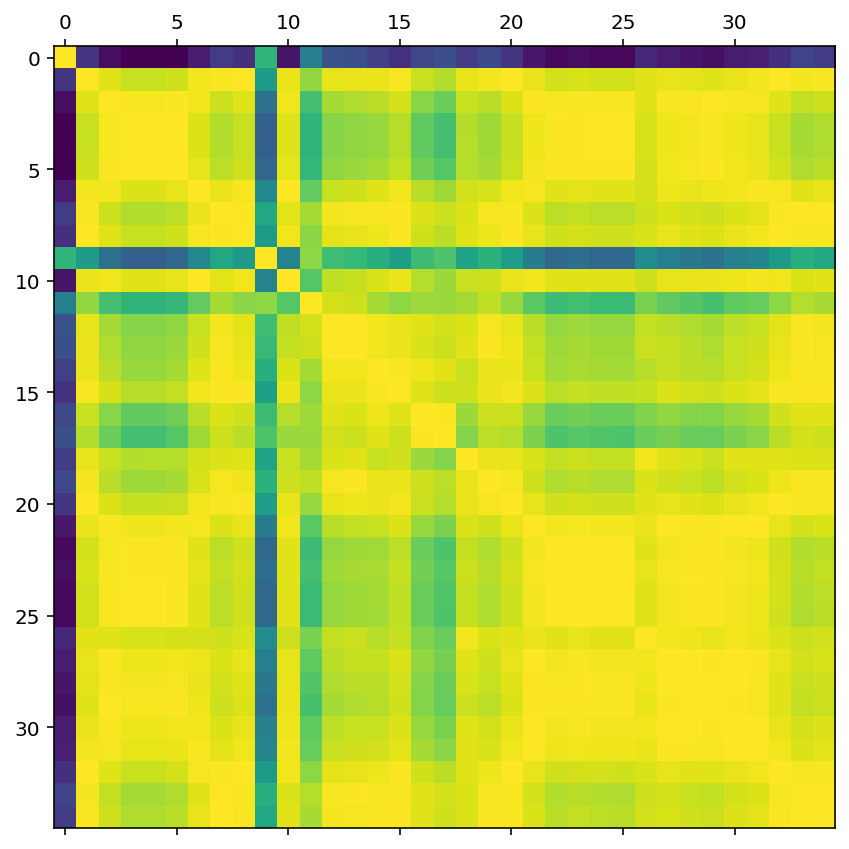

In [22]:
# plotting correlations for first 35 variables
plt.figure()
plt.matshow(b[:35,:35])
plt.show()

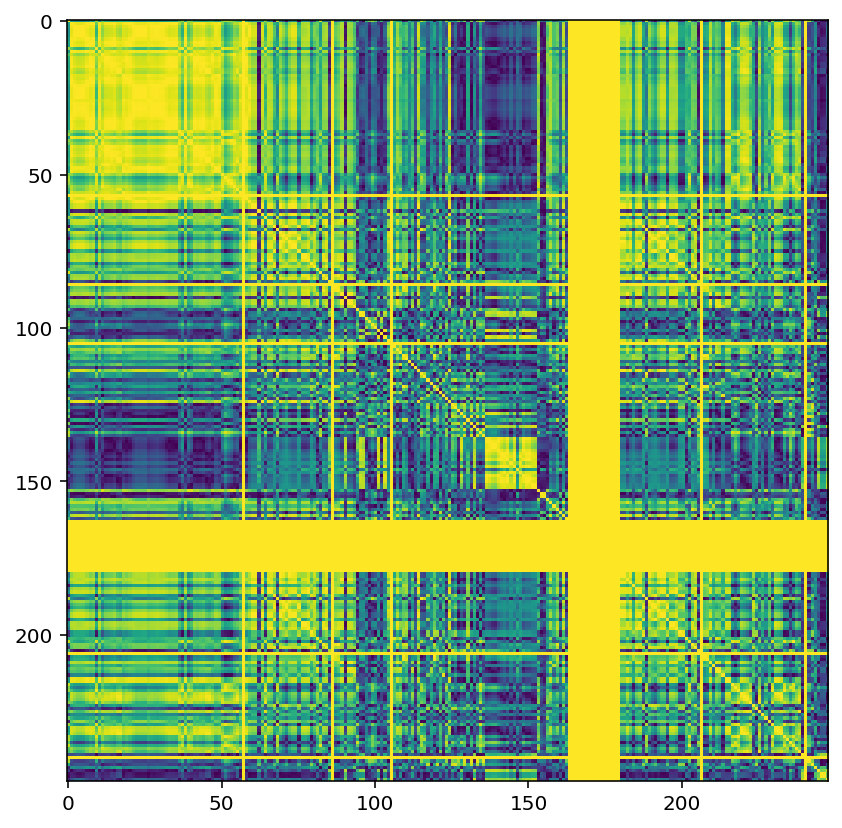

In [23]:
# plotting correlations for all variables
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(b, interpolation="nearest")
#ax1.show()

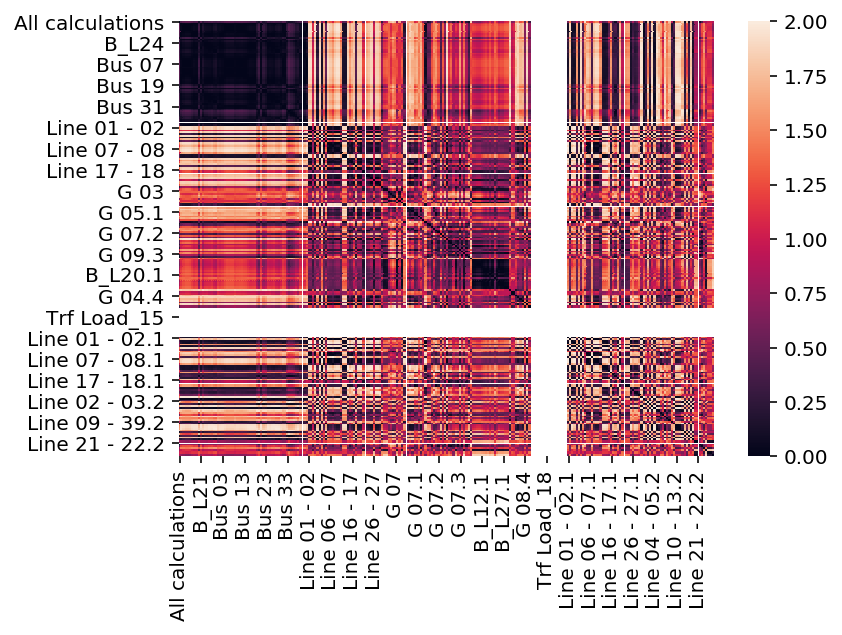

In [42]:
import seaborn as sns
%matplotlib inline
sns.heatmap(a)

In [120]:
def calculate_covriance(df_input, t1 = 1.1, t2 = 5): # t1 is time when disturbance is removed, t2 is time till when we want to calculate correlation
    sub_data_frame = df_input[df_input['All calculations'].astype(float)> t1]# getting values for time > 1.1 seconds
    sub_data_frame = sub_data_frame[sub_data_frame['All calculations'].astype(float)< t2] # getting values for time < 5 seconds
    df_corr = sub_data_frame.iloc[1:,:].astype(float).corr(method = 'spearman')
    df_corr.fillna(1, inplace = True) # filling NaN in correlations by 1. NaNs caused by constant values with time
    df_corr_numpy = np.abs(df_corr.to_numpy()) # converting to positive so that we can compare and take minimum safely
    df_corr_numpy[np.isnan(df_corr_numpy)]=1 # this loses the sequence of columns.. need to be careful
    return df_corr.abs(), df_corr_numpy, sub_data_frame

In [121]:
def add_NSG_columns_and_sort_columns_alphabetically(df_input):
    if not 'NSG_1' in df_input.columns:
        df_input['NSG_1'] = '0'
    if not 'NSG_2' in df_input.columns:
        df_input['NSG_2'] = '0'
    if not 'NSG_3' in df_input.columns:
        df_input['NSG_3'] = '0'
    df_input.sort_index(axis = 1, inplace = True)

In [122]:
def get_corr_from_scenario_number(scenario_number):
    file1 = simulation_files_dict[scenario_number] # 1000 scenario
    df1 = pd.read_csv(file1, dtype=str)
    df1 = df1.iloc[1:,:] # ignoring first row as it is a string
    add_NSG_columns_and_sort_columns_alphabetically(df1)
    df_corr_1, df_corr_numpy_1, sub_data_frame_1 = calculate_covriance(df1)
    return df_corr_1

In [132]:
file1 = simulation_files_dict[1000] # 1000 scenario
print(file1)
df1 = pd.read_csv(file1, dtype=str)
df1 = df1.iloc[1:,:] # ignoring first row as it is a string
file2 = simulation_files_dict[1225] # 3001 scenario
print(file2)
df2 = pd.read_csv(file2, dtype=str)
df2 = df2.iloc[1:,:] # ignoring first row as it is a string

1000_Line 22 - 23_load=0.7_wind=0_0.8_1.0.csv


1225_Line 04 - 05_load=0.7_wind=0.2_0_0.csv


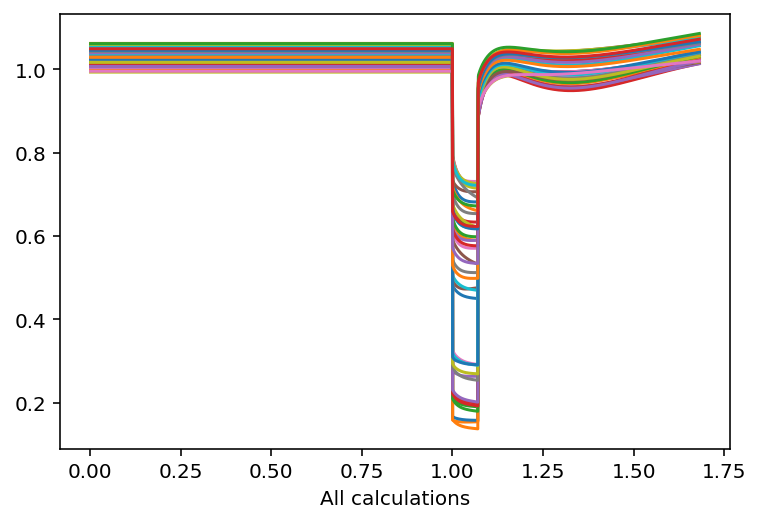

In [133]:
df2.iloc[range(2,400),0:45].astype(float).plot(x='All calculations', legend = False)

In [104]:

# df2['NSG_1']
add_NSG_columns_and_sort_columns_alphabetically(df1)
add_NSG_columns_and_sort_columns_alphabetically(df2)
df2['NSG_1']

1       0
2       0
3       0
4       0
5       0
       ..
3789    0
3790    0
3791    0
3792    0
3793    0
Name: NSG_1, Length: 3793, dtype: object

In [114]:
df_corr_1, df_corr_numpy_1, sub_data_frame_1 = calculate_covriance(df1)
df_corr_2, df_corr_numpy_2, sub_data_frame_2 = calculate_covriance(df2)

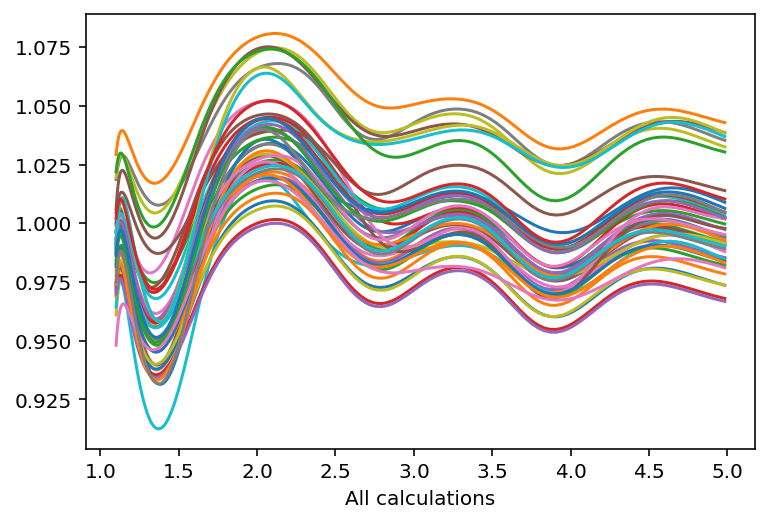

In [85]:
sub_data_frame_2.iloc[:,0:45].astype(float).plot(x='All calculations', legend = False)

In [115]:
df_corr_1.head()

,All calculations,B_L03,B_L03.1,B_L04,B_L04.1,B_L07,B_L07.1,B_L08,B_L08.1,B_L12,...,Trf Load_18,Trf Load_20,Trf Load_21,Trf Load_23,Trf Load_24,Trf Load_25,Trf Load_26,Trf Load_27,Trf Load_28,Trf Load_29
All calculations,1.000000,0.695002,0.399432,0.635517,0.382700,0.612896,0.376614,0.612342,0.377733,0.614461,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L03,0.695002,1.000000,0.179478,0.972853,0.162303,0.948849,0.148001,0.948464,0.148128,0.956118,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L03.1,0.399432,0.179478,1.000000,0.287849,0.997095,0.338363,0.988089,0.339279,0.984088,0.321338,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L04,0.635517,0.972853,0.287849,1.000000,0.274274,0.992114,0.263457,0.991953,0.263986,0.995255,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L04.1,0.382700,0.162303,0.997095,0.274274,1.000000,0.328729,0.995421,0.329669,0.991984,0.310390,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [116]:

df_corr_2.head()

,All calculations,B_L03,B_L03.1,B_L04,B_L04.1,B_L07,B_L07.1,B_L08,B_L08.1,B_L12,...,Trf Load_18,Trf Load_20,Trf Load_21,Trf Load_23,Trf Load_24,Trf Load_25,Trf Load_26,Trf Load_27,Trf Load_28,Trf Load_29
All calculations,1.000000,0.318762,0.250838,0.189551,0.343655,0.218006,0.399501,0.214376,0.419990,0.260555,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L03,0.318762,1.000000,0.139205,0.824859,0.104845,0.804231,0.056629,0.805790,0.043405,0.777358,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L03.1,0.250838,0.139205,1.000000,0.326082,0.989664,0.334076,0.970912,0.335400,0.962006,0.341907,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L04,0.189551,0.824859,0.326082,1.000000,0.342026,0.997822,0.328564,0.997812,0.325410,0.992737,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L04.1,0.343655,0.104845,0.989664,0.342026,1.000000,0.353879,0.992480,0.354814,0.986782,0.365717,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [117]:
df_min_corr = df_corr_1.copy()
df_min_corr.where(df_min_corr < df_corr_2, df_corr_2)

,All calculations,B_L03,B_L03.1,B_L04,B_L04.1,B_L07,B_L07.1,B_L08,B_L08.1,B_L12,...,Trf Load_18,Trf Load_20,Trf Load_21,Trf Load_23,Trf Load_24,Trf Load_25,Trf Load_26,Trf Load_27,Trf Load_28,Trf Load_29
All calculations,1.000000,0.318762,0.250838,0.189551,0.343655,0.218006,0.376614,0.214376,0.377733,0.260555,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L03,0.318762,1.000000,0.139205,0.824859,0.104845,0.804231,0.056629,0.805790,0.043405,0.777358,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L03.1,0.250838,0.139205,1.000000,0.287849,0.989664,0.334076,0.970912,0.335400,0.962006,0.321338,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L04,0.189551,0.824859,0.287849,1.000000,0.274274,0.992114,0.263457,0.991953,0.263986,0.992737,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B_L04.1,0.343655,0.104845,0.989664,0.274274,1.000000,0.328729,0.992480,0.329669,0.986782,0.310390,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trf Load_25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Trf Load_26,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Trf Load_27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Trf Load_28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [134]:
df_corr_min = get_corr_from_scenario_number(1)
for scenario_index in range(2,4000):
    df_corr_new = get_corr_from_scenario_number(scenario_index)
    try:
        df_corr_min.where(df_corr_min < df_corr_new, df_corr_new)
    except:
        print(scenario_index, " did not satisfy sizes...")
    
    
# sns.heatmap(df_corr_min)
sns.heatmap(1-df_corr_min)


1225  did not satisfy sizes...


1226  did not satisfy sizes...


1227  did not satisfy sizes...


1228  did not satisfy sizes...


1229  did not satisfy sizes...


1230  did not satisfy sizes...


1231  did not satisfy sizes...


1232  did not satisfy sizes...


1233  did not satisfy sizes...


1234  did not satisfy sizes...


1235  did not satisfy sizes...


1236  did not satisfy sizes...


1237  did not satisfy sizes...


1238  did not satisfy sizes...


1239  did not satisfy sizes...


1240  did not satisfy sizes...


1241  did not satisfy sizes...


1242  did not satisfy sizes...


1243  did not satisfy sizes...


1244  did not satisfy sizes...


1245  did not satisfy sizes...


1246  did not satisfy sizes...


1247  did not satisfy sizes...


1248  did not satisfy sizes...


1249  did not satisfy sizes...


1250  did not satisfy sizes...


1251  did not satisfy sizes...


1252  did not satisfy sizes...


1253  did not satisfy sizes...


1254  did not satisfy sizes...


1255  did not satisfy sizes...


1256  did not satisfy sizes...


1257  did not satisfy sizes...


1258  did not satisfy sizes...


1259  did not satisfy sizes...


1260  did not satisfy sizes...


1261  did not satisfy sizes...


1262  did not satisfy sizes...


1263  did not satisfy sizes...


1264  did not satisfy sizes...


1265  did not satisfy sizes...


1266  did not satisfy sizes...


1267  did not satisfy sizes...


1268  did not satisfy sizes...


1269  did not satisfy sizes...


1270  did not satisfy sizes...


1271  did not satisfy sizes...


1272  did not satisfy sizes...


1273  did not satisfy sizes...


1274  did not satisfy sizes...


1275  did not satisfy sizes...


1276  did not satisfy sizes...


1277  did not satisfy sizes...


1278  did not satisfy sizes...


1279  did not satisfy sizes...


1280  did not satisfy sizes...


1281  did not satisfy sizes...


1282  did not satisfy sizes...


1283  did not satisfy sizes...


1284  did not satisfy sizes...


1285  did not satisfy sizes...


1286  did not satisfy sizes...


1287  did not satisfy sizes...


1288  did not satisfy sizes...


1289  did not satisfy sizes...


1290  did not satisfy sizes...


1291  did not satisfy sizes...


1292  did not satisfy sizes...


1293  did not satisfy sizes...


1294  did not satisfy sizes...


1295  did not satisfy sizes...


1296  did not satisfy sizes...


1297  did not satisfy sizes...


1298  did not satisfy sizes...


1299  did not satisfy sizes...


1300  did not satisfy sizes...


1301  did not satisfy sizes...


1302  did not satisfy sizes...


1303  did not satisfy sizes...


1304  did not satisfy sizes...


1305  did not satisfy sizes...


1306  did not satisfy sizes...


1307  did not satisfy sizes...


1308  did not satisfy sizes...


1309  did not satisfy sizes...
1310  did not satisfy sizes...


1311  did not satisfy sizes...


1312  did not satisfy sizes...


1313  did not satisfy sizes...


1314  did not satisfy sizes...


1315  did not satisfy sizes...


1316  did not satisfy sizes...


1317  did not satisfy sizes...


1318  did not satisfy sizes...


1319  did not satisfy sizes...


1320  did not satisfy sizes...


1321  did not satisfy sizes...


1322  did not satisfy sizes...


1323  did not satisfy sizes...


1324  did not satisfy sizes...


1325  did not satisfy sizes...


1326  did not satisfy sizes...


1327  did not satisfy sizes...


1328  did not satisfy sizes...


1329  did not satisfy sizes...


1330  did not satisfy sizes...


1331  did not satisfy sizes...


1332  did not satisfy sizes...


1333  did not satisfy sizes...


1334  did not satisfy sizes...


1335  did not satisfy sizes...


1336  did not satisfy sizes...


1337  did not satisfy sizes...


1338  did not satisfy sizes...


1339  did not satisfy sizes...


1340  did not satisfy sizes...


1341  did not satisfy sizes...


1342  did not satisfy sizes...


1343  did not satisfy sizes...


1344  did not satisfy sizes...


1345  did not satisfy sizes...


1346  did not satisfy sizes...


1347  did not satisfy sizes...


1348  did not satisfy sizes...


1349  did not satisfy sizes...


1350  did not satisfy sizes...


1351  did not satisfy sizes...


1352  did not satisfy sizes...


1353  did not satisfy sizes...


1354  did not satisfy sizes...


1355  did not satisfy sizes...


1356  did not satisfy sizes...


1357  did not satisfy sizes...


1358  did not satisfy sizes...


1359  did not satisfy sizes...


1360  did not satisfy sizes...


1361  did not satisfy sizes...


1362  did not satisfy sizes...


1363  did not satisfy sizes...


1364  did not satisfy sizes...


1365  did not satisfy sizes...


1366  did not satisfy sizes...


1367  did not satisfy sizes...


1368  did not satisfy sizes...


1369  did not satisfy sizes...


1370  did not satisfy sizes...


1371  did not satisfy sizes...


1372  did not satisfy sizes...


1373  did not satisfy sizes...


1374  did not satisfy sizes...


1375  did not satisfy sizes...


1376  did not satisfy sizes...


1377  did not satisfy sizes...


1378  did not satisfy sizes...


1379  did not satisfy sizes...


1380  did not satisfy sizes...


1381  did not satisfy sizes...


1382  did not satisfy sizes...


1383  did not satisfy sizes...


1384  did not satisfy sizes...


1385  did not satisfy sizes...


1386  did not satisfy sizes...


1387  did not satisfy sizes...


1388  did not satisfy sizes...


1389  did not satisfy sizes...


1390  did not satisfy sizes...


1391  did not satisfy sizes...


1392  did not satisfy sizes...


1393  did not satisfy sizes...


1394  did not satisfy sizes...


1395  did not satisfy sizes...


1396  did not satisfy sizes...


1397  did not satisfy sizes...


1398  did not satisfy sizes...


1399  did not satisfy sizes...


1400  did not satisfy sizes...


1401  did not satisfy sizes...


1402  did not satisfy sizes...


1403  did not satisfy sizes...


1404  did not satisfy sizes...


1405  did not satisfy sizes...


1406  did not satisfy sizes...


1407  did not satisfy sizes...


1408  did not satisfy sizes...


1409  did not satisfy sizes...


1410  did not satisfy sizes...


1411  did not satisfy sizes...


1412  did not satisfy sizes...


1413  did not satisfy sizes...


1414  did not satisfy sizes...


1415  did not satisfy sizes...


1416  did not satisfy sizes...


1417  did not satisfy sizes...


1418  did not satisfy sizes...


1419  did not satisfy sizes...


1420  did not satisfy sizes...


1421  did not satisfy sizes...


1422  did not satisfy sizes...


1423  did not satisfy sizes...


1424  did not satisfy sizes...


1425  did not satisfy sizes...


1426  did not satisfy sizes...


1427  did not satisfy sizes...


1428  did not satisfy sizes...


1429  did not satisfy sizes...


1430  did not satisfy sizes...


1431  did not satisfy sizes...


1432  did not satisfy sizes...


1433  did not satisfy sizes...


1434  did not satisfy sizes...


1435  did not satisfy sizes...


1436  did not satisfy sizes...


1437  did not satisfy sizes...


1438  did not satisfy sizes...


1439  did not satisfy sizes...


1440  did not satisfy sizes...


1441  did not satisfy sizes...


1442  did not satisfy sizes...


1443  did not satisfy sizes...


1444  did not satisfy sizes...


1445  did not satisfy sizes...


1446  did not satisfy sizes...


1447  did not satisfy sizes...


1448  did not satisfy sizes...


1449  did not satisfy sizes...


1450  did not satisfy sizes...


1451  did not satisfy sizes...


1452  did not satisfy sizes...


1453  did not satisfy sizes...


1454  did not satisfy sizes...


1455  did not satisfy sizes...


1456  did not satisfy sizes...


1457  did not satisfy sizes...


1458  did not satisfy sizes...


1459  did not satisfy sizes...


1460  did not satisfy sizes...


1461  did not satisfy sizes...


1462  did not satisfy sizes...


1463  did not satisfy sizes...


1464  did not satisfy sizes...


1465  did not satisfy sizes...


1466  did not satisfy sizes...


1467  did not satisfy sizes...


1468  did not satisfy sizes...


1469  did not satisfy sizes...


1470  did not satisfy sizes...


1471  did not satisfy sizes...


1472  did not satisfy sizes...


1473  did not satisfy sizes...


1474  did not satisfy sizes...


1475  did not satisfy sizes...


1476  did not satisfy sizes...


1477  did not satisfy sizes...


1478  did not satisfy sizes...


1479  did not satisfy sizes...


1480  did not satisfy sizes...


1481  did not satisfy sizes...


1482  did not satisfy sizes...


1483  did not satisfy sizes...


1484  did not satisfy sizes...


1485  did not satisfy sizes...


1486  did not satisfy sizes...


1487  did not satisfy sizes...


1488  did not satisfy sizes...


1489  did not satisfy sizes...


1490  did not satisfy sizes...


1491  did not satisfy sizes...


1492  did not satisfy sizes...


1493  did not satisfy sizes...


1494  did not satisfy sizes...


1495  did not satisfy sizes...


1496  did not satisfy sizes...


1497  did not satisfy sizes...


1498  did not satisfy sizes...


1499  did not satisfy sizes...


1500  did not satisfy sizes...


1501  did not satisfy sizes...


1502  did not satisfy sizes...


1503  did not satisfy sizes...


1504  did not satisfy sizes...


1505  did not satisfy sizes...


1506  did not satisfy sizes...


1507  did not satisfy sizes...


1508  did not satisfy sizes...


1509  did not satisfy sizes...


1510  did not satisfy sizes...


1511  did not satisfy sizes...


1512  did not satisfy sizes...


1513  did not satisfy sizes...
1514  did not satisfy sizes...


1515  did not satisfy sizes...


1516  did not satisfy sizes...


1517  did not satisfy sizes...


1518  did not satisfy sizes...


1519  did not satisfy sizes...


1520  did not satisfy sizes...


1521  did not satisfy sizes...


1522  did not satisfy sizes...


1523  did not satisfy sizes...


1524  did not satisfy sizes...


1525  did not satisfy sizes...


1526  did not satisfy sizes...


1527  did not satisfy sizes...


1528  did not satisfy sizes...


1529  did not satisfy sizes...


1530  did not satisfy sizes...


1531  did not satisfy sizes...


1532  did not satisfy sizes...


1533  did not satisfy sizes...


1534  did not satisfy sizes...


1535  did not satisfy sizes...


1536  did not satisfy sizes...


1537  did not satisfy sizes...


1538  did not satisfy sizes...


1539  did not satisfy sizes...


1540  did not satisfy sizes...


1541  did not satisfy sizes...


1542  did not satisfy sizes...


1543  did not satisfy sizes...


1544  did not satisfy sizes...


1545  did not satisfy sizes...


1546  did not satisfy sizes...


1547  did not satisfy sizes...


1548  did not satisfy sizes...


1549  did not satisfy sizes...


1550  did not satisfy sizes...


1551  did not satisfy sizes...


1552  did not satisfy sizes...


1553  did not satisfy sizes...


1554  did not satisfy sizes...


1555  did not satisfy sizes...


1556  did not satisfy sizes...


1557  did not satisfy sizes...


1558  did not satisfy sizes...


1559  did not satisfy sizes...


1560  did not satisfy sizes...


1561  did not satisfy sizes...


1562  did not satisfy sizes...


1563  did not satisfy sizes...


1564  did not satisfy sizes...


1565  did not satisfy sizes...


1566  did not satisfy sizes...


1567  did not satisfy sizes...


1568  did not satisfy sizes...


1569  did not satisfy sizes...


1570  did not satisfy sizes...


1571  did not satisfy sizes...


1572  did not satisfy sizes...


1573  did not satisfy sizes...


1574  did not satisfy sizes...


1575  did not satisfy sizes...


1576  did not satisfy sizes...


1577  did not satisfy sizes...


1578  did not satisfy sizes...


1579  did not satisfy sizes...


1580  did not satisfy sizes...


1581  did not satisfy sizes...


1582  did not satisfy sizes...


1583  did not satisfy sizes...


1584  did not satisfy sizes...


1585  did not satisfy sizes...


1586  did not satisfy sizes...


1587  did not satisfy sizes...


1588  did not satisfy sizes...


1589  did not satisfy sizes...


1590  did not satisfy sizes...


1591  did not satisfy sizes...


1592  did not satisfy sizes...


1593  did not satisfy sizes...


1594  did not satisfy sizes...


1595  did not satisfy sizes...


1596  did not satisfy sizes...


1597  did not satisfy sizes...


1598  did not satisfy sizes...


1599  did not satisfy sizes...


1600  did not satisfy sizes...


1601  did not satisfy sizes...


1602  did not satisfy sizes...


1603  did not satisfy sizes...


1604  did not satisfy sizes...


1605  did not satisfy sizes...


1606  did not satisfy sizes...


1607  did not satisfy sizes...


1608  did not satisfy sizes...


1609  did not satisfy sizes...


1610  did not satisfy sizes...


1611  did not satisfy sizes...


1612  did not satisfy sizes...


1613  did not satisfy sizes...


1614  did not satisfy sizes...


1615  did not satisfy sizes...
1616  did not satisfy sizes...


1617  did not satisfy sizes...


1618  did not satisfy sizes...


1619  did not satisfy sizes...


1620  did not satisfy sizes...


1621  did not satisfy sizes...


1622  did not satisfy sizes...


1623  did not satisfy sizes...


1624  did not satisfy sizes...


1625  did not satisfy sizes...


1626  did not satisfy sizes...


1627  did not satisfy sizes...


1628  did not satisfy sizes...


1629  did not satisfy sizes...


1630  did not satisfy sizes...


1631  did not satisfy sizes...


1632  did not satisfy sizes...


1633  did not satisfy sizes...


1634  did not satisfy sizes...


1635  did not satisfy sizes...


1636  did not satisfy sizes...


1637  did not satisfy sizes...


1638  did not satisfy sizes...


1639  did not satisfy sizes...


1640  did not satisfy sizes...


1641  did not satisfy sizes...


1642  did not satisfy sizes...


1643  did not satisfy sizes...


1644  did not satisfy sizes...


1645  did not satisfy sizes...


1646  did not satisfy sizes...


1647  did not satisfy sizes...


1648  did not satisfy sizes...


1649  did not satisfy sizes...


1650  did not satisfy sizes...


1651  did not satisfy sizes...


1652  did not satisfy sizes...


1653  did not satisfy sizes...


1654  did not satisfy sizes...


1655  did not satisfy sizes...


1656  did not satisfy sizes...


KeyboardInterrupt: 

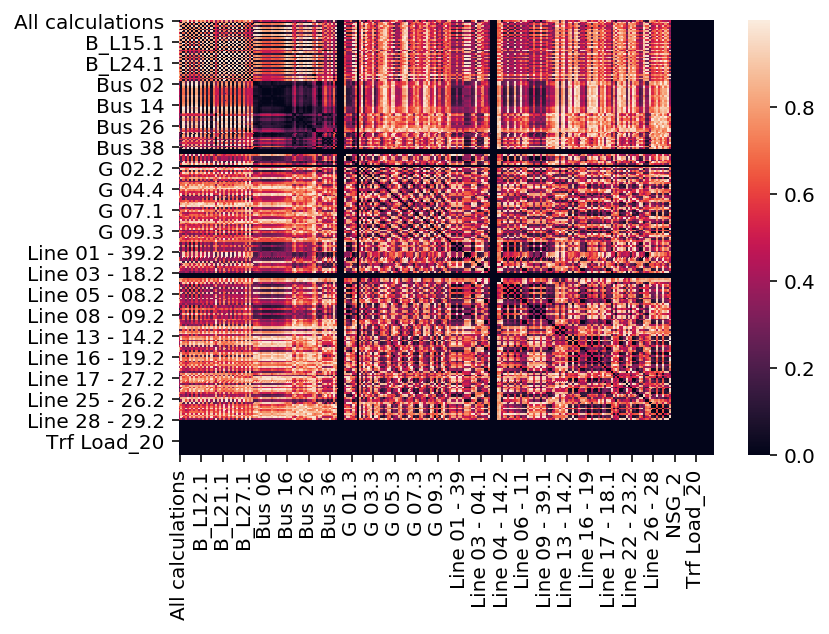

In [135]:
sns.heatmap(1-df_corr_min)
